### Notes

http://www.jmlr.org/papers/volume11/ojala10a/ojala10a.pdf

TODO:
Class imbalance examples (no, medium, and high imbalance)
When everyone is predicted to have the same score
When everyone is predicted to have two or three scores (discrete predictions, do trimmed mean for middle values that are all the same?)
Multiclass ROC (how to deal with multiple predictions per sample)
Extremely large sample size, large, medium, small, extremely small
Make sure we never divide by zero for random predictors, etc.
Address the question that people ask, "At what level of accuracy do you get excited?" Use bootstrap subsampling to calculate confidence intervals as a way to address this. Should see wider intervals for smaller data sets. Another way to address this is to make it so we can calculate various types of metric: Accuracy, PPV, NPV, Sensitivity, Specificity, etc.

In [202]:
library(pROC)

In [264]:
numRandomValues = 1000

actual = factor(c(rep(0, numRandomValues * 0.5), rep(1, numRandomValues * 0.5)))

randomScores = rnorm(numRandomValues)

signalScores = c(rnorm(numRandomValues * 0.5), rnorm(numRandomValues * 0.5, mean=10))
randomScores = (randomScores - min(randomScores)) / (max(randomScores) - min(randomScores))
signalScores = (signalScores - min(signalScores)) / (max(signalScores) - min(signalScores))
idealScores = c(rep(0, numRandomValues * 0.5), rep(1, numRandomValues * 0.5))

actualImbalanced = factor(c(rep(0, numRandomValues * 0.9), rep(1, numRandomValues * 0.1)))

signalScoresImbalanced = c(rnorm(numRandomValues * 0.9), rnorm(numRandomValues * 0.1, mean=10))
signalScoresImbalanced = (signalScores - min(signalScores)) / (max(signalScores) - min(signalScores))
idealScoresImbalanced = c(rep(0, numRandomValues * 0.9), rep(1, numRandomValues * 0.1))

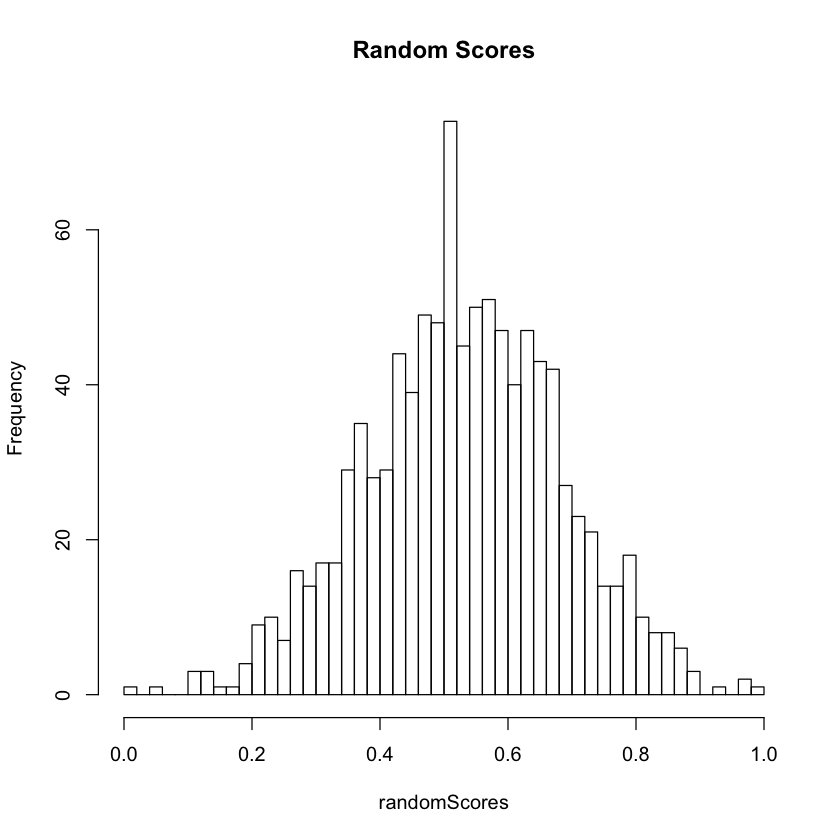

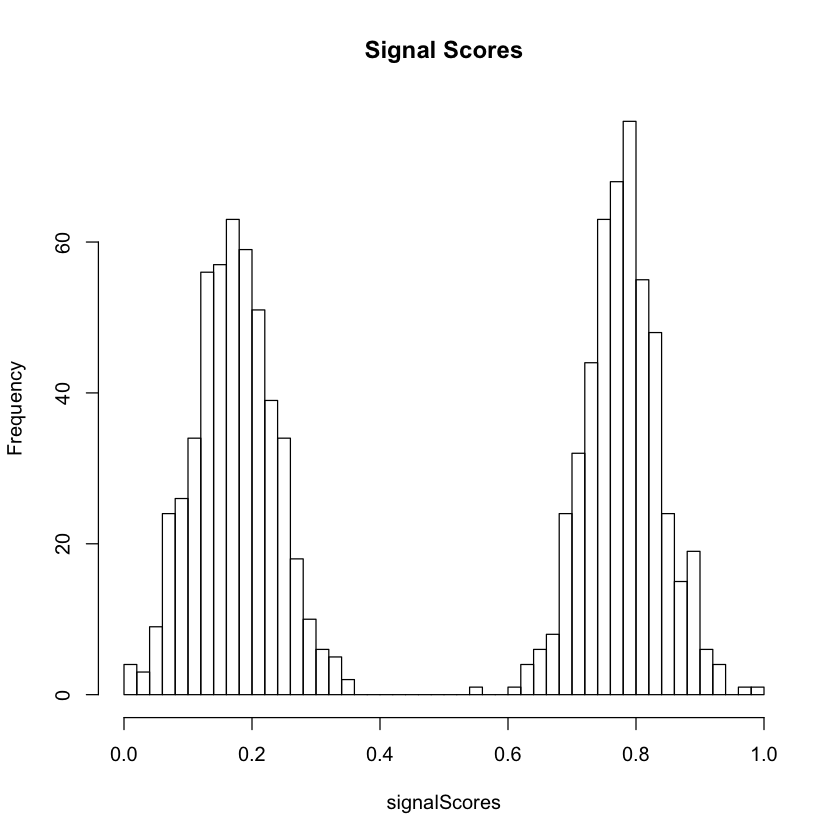

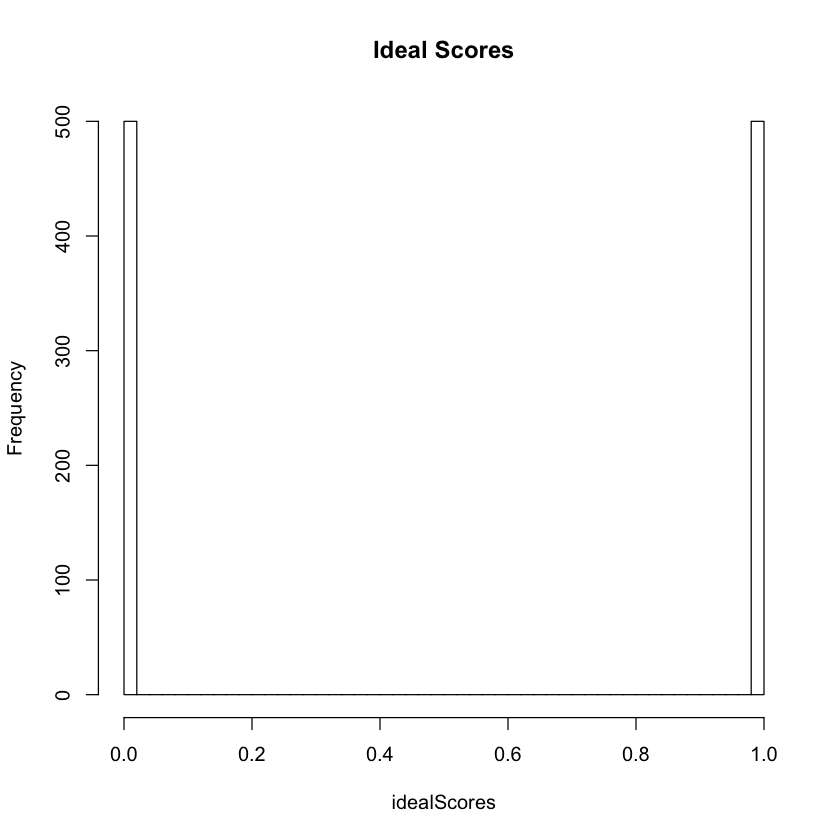

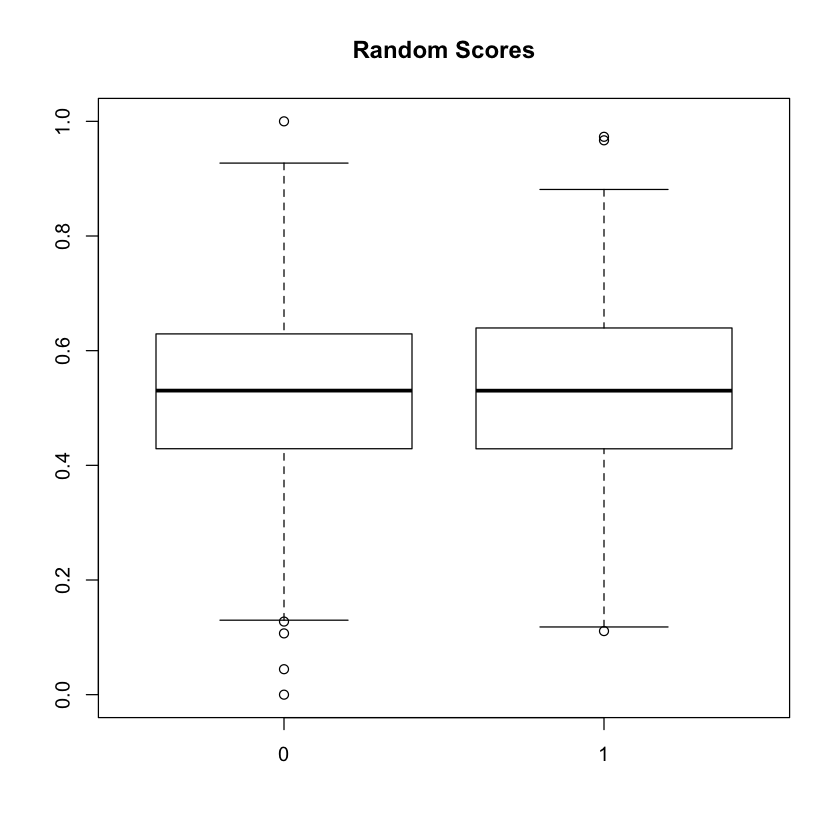

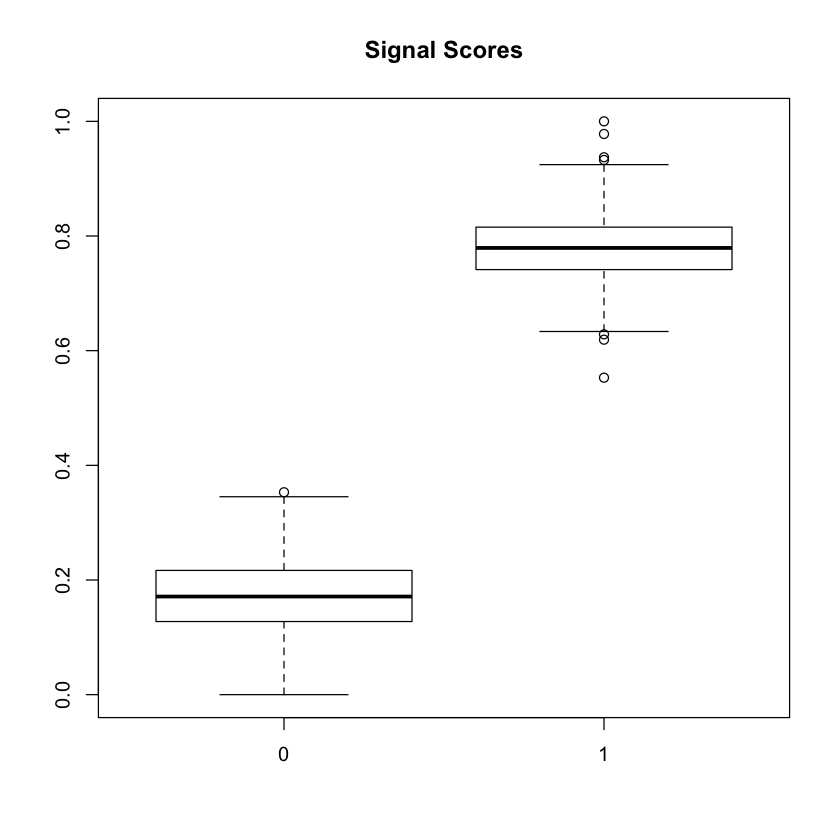

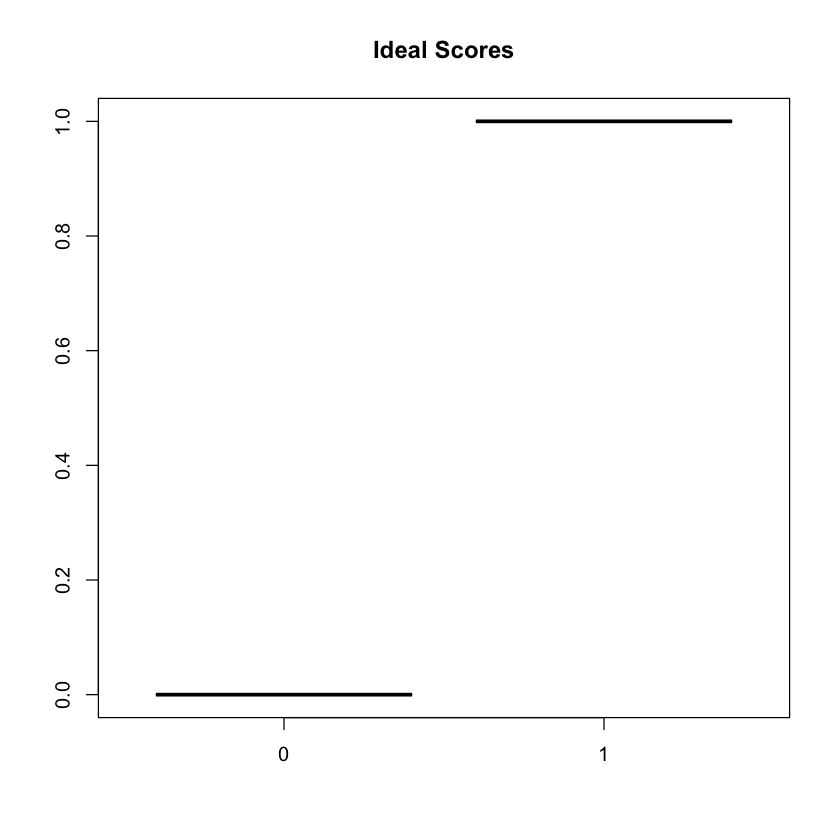

In [265]:
hist(randomScores, breaks=50, main="Random Scores")
hist(signalScores, breaks=50, main="Signal Scores")
hist(idealScores, breaks=50, main="Ideal Scores")
boxplot(randomScores~actual, main="Random Scores")
boxplot(signalScores~actual, main="Signal Scores")
boxplot(idealScores~actual, main="Ideal Scores")

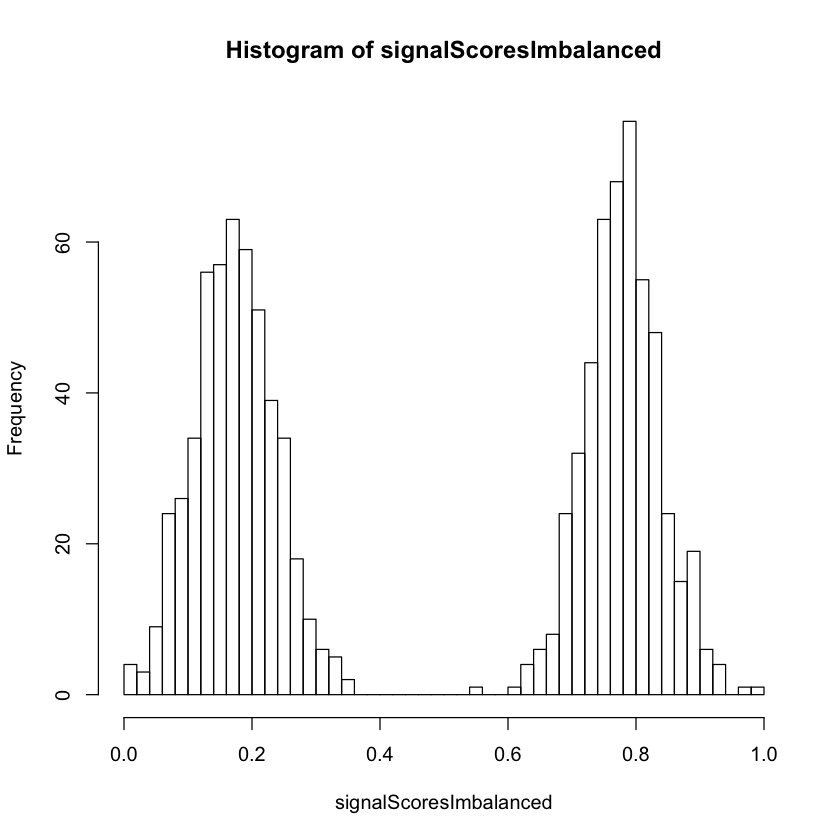

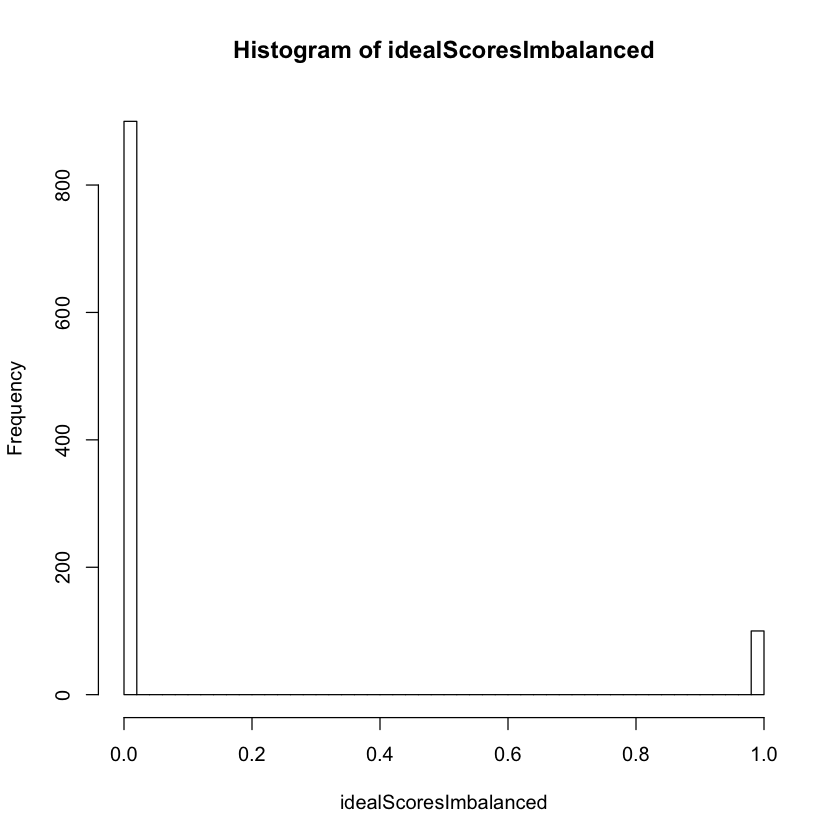

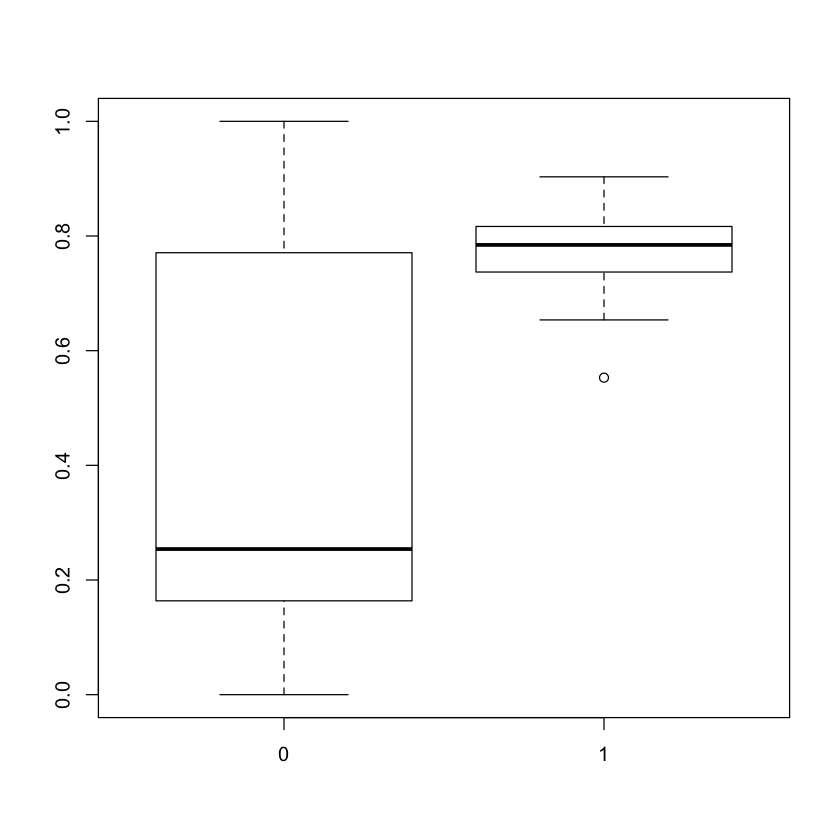

   [1] 0.266209826 0.162553798 0.182715999 0.140291671 0.173697045 0.077684837
   [7] 0.314028905 0.105639625 0.135615787 0.128596136 0.154633934 0.110960700
  [13] 0.128934192 0.196405066 0.173445932 0.060141233 0.225460855 0.253479839
  [19] 0.256483416 0.143502469 0.242757966 0.125386253 0.179084930 0.155469490
  [25] 0.172009951 0.233133994 0.292970573 0.168576202 0.070106328 0.199760132
  [31] 0.244866928 0.192981560 0.156384118 0.207684300 0.191271406 0.203023357
  [37] 0.120813850 0.169837672 0.228732753 0.187526585 0.117356256 0.158411550
  [43] 0.200739232 0.125647783 0.201259465 0.228457861 0.200746451 0.091133121
  [49] 0.175320170 0.162000030 0.075392930 0.167491506 0.291194119 0.084393457
  [55] 0.156398761 0.186250710 0.130022329 0.292702973 0.153291679 0.252246967
  [61] 0.147289245 0.108033430 0.185551756 0.216739062 0.266754907 0.002108508
  [67] 0.130949313 0.231250275 0.191125111 0.195788523 0.178781257 0.151344431
  [73] 0.131741724 0.200113955 0.201916710 0.0850666

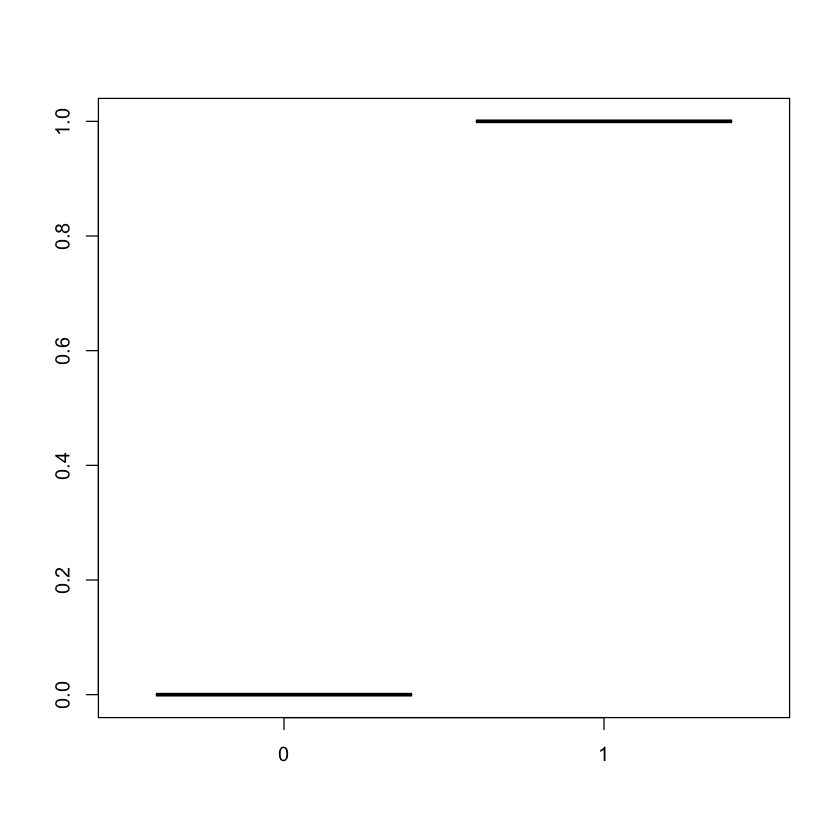

In [267]:
hist(signalScoresImbalanced, breaks=50)
hist(idealScoresImbalanced, breaks=50)
boxplot(signalScoresImbalanced~actualImbalanced)
boxplot(idealScoresImbalanced~actualImbalanced)
print(signalScoresImbalanced)


Call:
roc.default(response = actual, predictor = randomScores, plot = TRUE,     main = "Random Scores")

Data: randomScores in 500 controls (actual 0) < 500 cases (actual 1).
Area under the curve: 0.4994

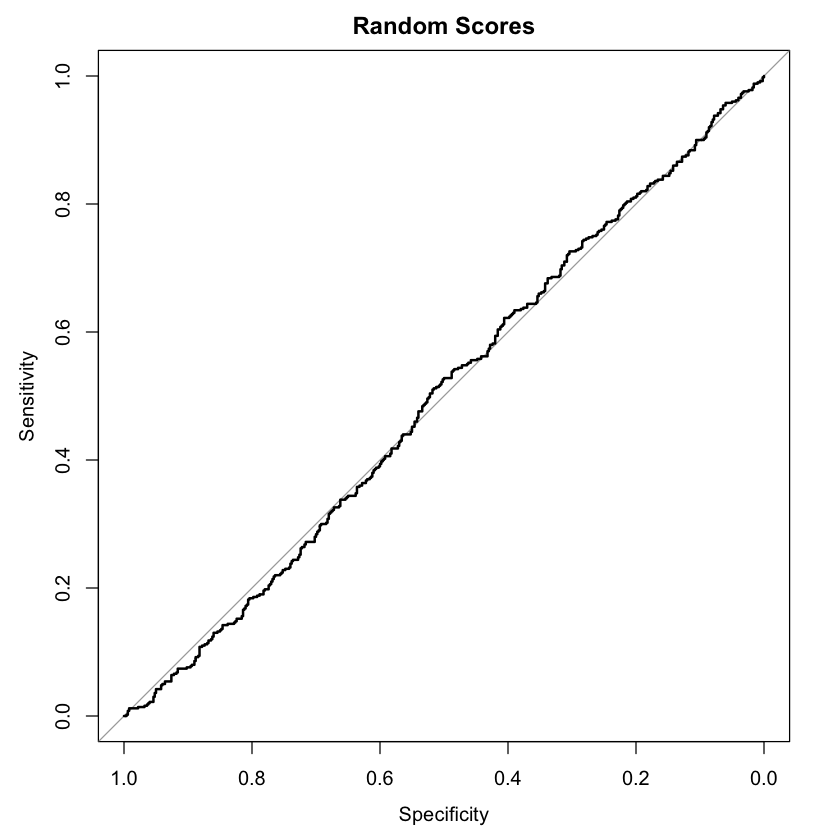


Call:
roc.default(response = actual, predictor = signalScores, plot = TRUE,     main = "Signal Scores")

Data: signalScores in 500 controls (actual 0) < 500 cases (actual 1).
Area under the curve: 1

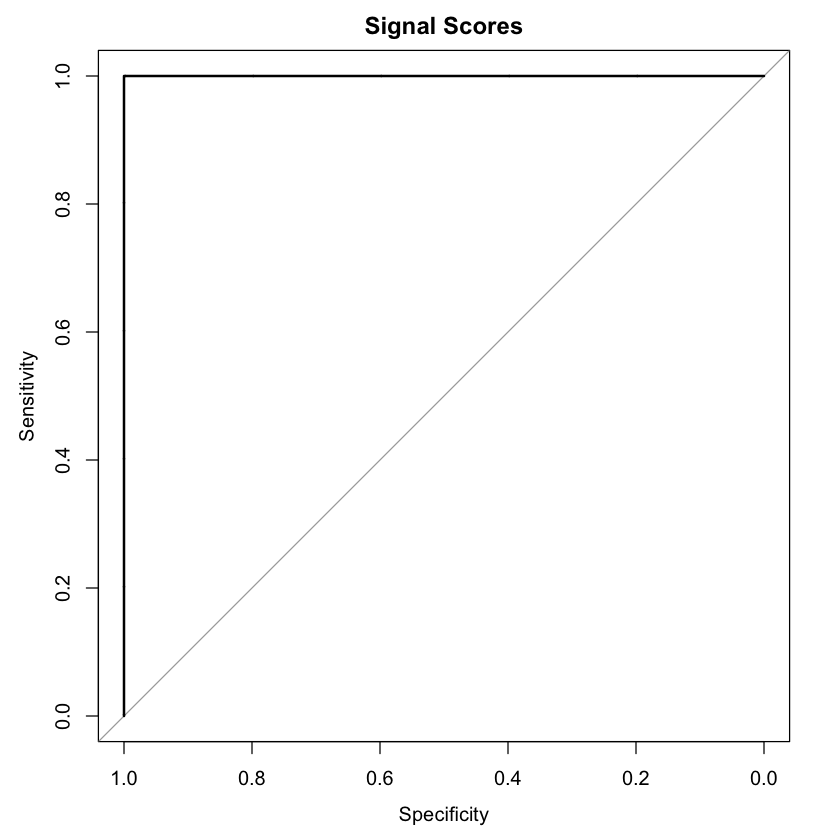


Call:
roc.default(response = actual, predictor = idealScores, plot = TRUE,     main = "Ideal Scores")

Data: idealScores in 500 controls (actual 0) < 500 cases (actual 1).
Area under the curve: 1

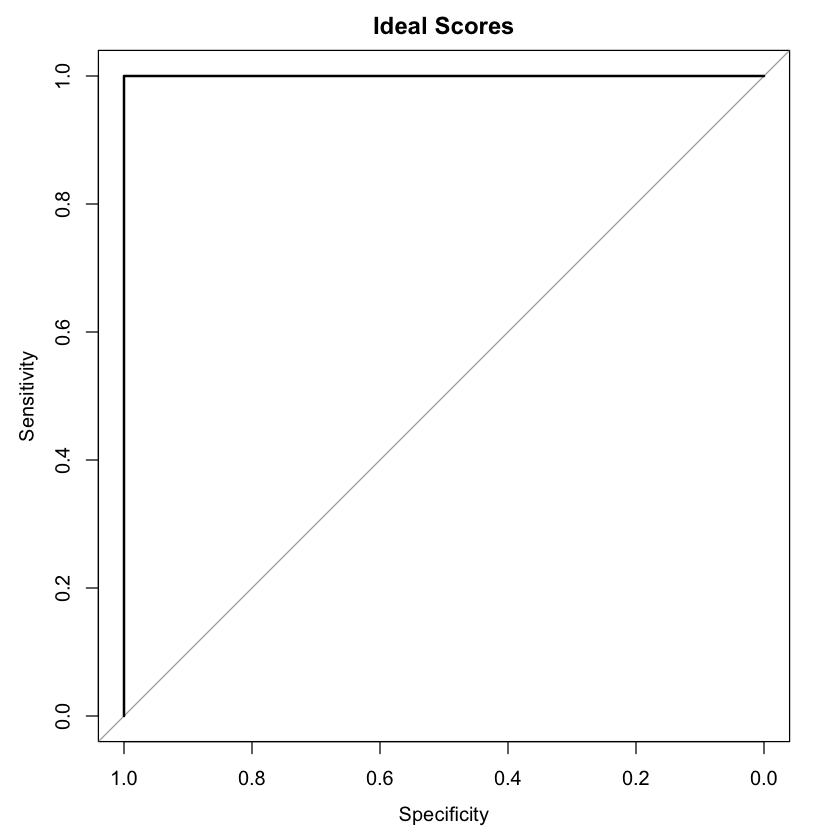


Call:
roc.default(response = actual, predictor = signalScoresImbalanced,     plot = TRUE, main = "Signal Scores Imbalanced")

Data: signalScoresImbalanced in 500 controls (actual 0) < 500 cases (actual 1).
Area under the curve: 1

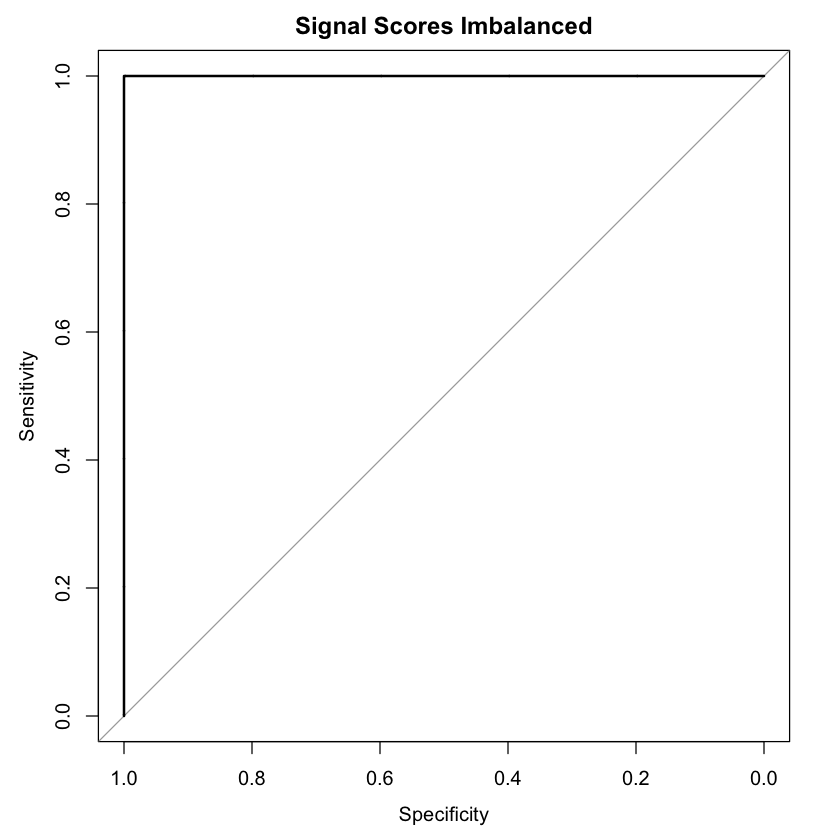


Call:
roc.default(response = actual, predictor = idealScoresImbalanced,     plot = TRUE, main = "Ideal Scores Imbalanced")

Data: idealScoresImbalanced in 500 controls (actual 0) < 500 cases (actual 1).
Area under the curve: 0.6

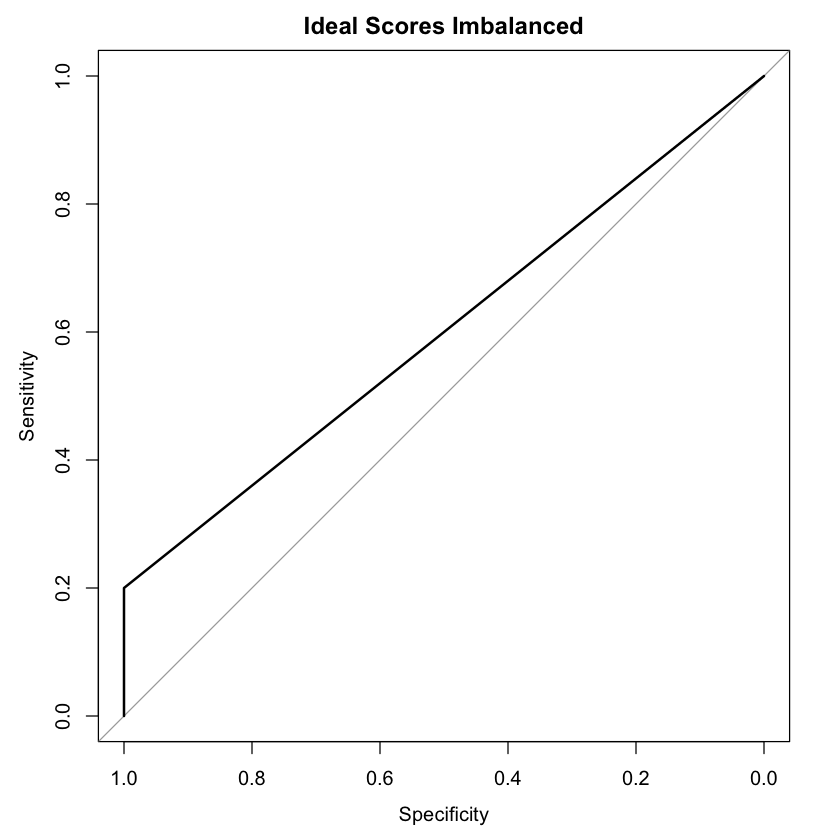

In [263]:
roc(actual, randomScores, plot=TRUE, main="Random Scores")
roc(actual, signalScores, plot=TRUE, main="Signal Scores")
roc(actual, idealScores, plot=TRUE, main="Ideal Scores")
roc(actual, signalScoresImbalanced, plot=TRUE, main="Signal Scores Imbalanced")
roc(actual, idealScoresImbalanced, plot=TRUE, main="Ideal Scores Imbalanced")

In [244]:
pare <- function(response, predictor)
{
    thresholdStepSize = max(predictor) - min(predictor)) / (length(predictor) + 1
    thresholds = seq(min(predictor), max(predictor), thresholdStepSize)

#    thresholds = NULL
#    sortedPredictor = sort(predictor)
#    for (i in 2:length(predictor))
#        thresholds = c(thresholds, median(sortedPredictor[i-1], sortedPredictor[i]))

    baselineAccuracyAtThresholds = rep(max(table(response)) / length(response), length(thresholds))
    
#    permutedAccuracyAtThresholds = NULL
#    for (threshold in thresholds)
#    {
#        predictorDiscretized = as.integer(predictor > threshold)
#
#        permutedResponse = sample(response)
#        permutedAccuracy = sum(predictorDiscretized == permutedResponse) / length(response)
#        permutedAccuracyAtThresholds = c(permutedAccuracyAtThresholds, permutedAccuracy)
#    }
    
    accuracyAtThresholds = calculateAccuracyAtThresholds(response, predictor, thresholds)
    idealAccuracyAtThresholds = calculateAccuracyAtThresholds(response, as.numeric(as.vector(response)), thresholds)

    diffFromBaseline = mean(accuracyAtThresholds - baselineAccuracyAtThresholds)
    print(diffFromBaseline)
    idealDiffFromBaseline = mean(idealAccuracyAtThresholds - baselineAccuracyAtThresholds)
    print(idealDiffFromBaseline)
    ratioToIdeal = diffFromBaseline / idealDiffFromBaseline
    print(ratioToIdeal)
    
    
    plot(thresholds, accuracyAtThresholds, type="l", ylim=c(0, 1))
    lines(thresholds, baselineAccuracyAtThresholds, col=2)
    #lines(thresholds, permutedAccuracyAtThresholds, col=4)
    #legend("bottomright", lwd=1, legend=c("Actual", "Baseline", "Permuted"), col=c(1, 2, 4))
    legend("bottomright", lwd=1, legend=c("Actual", "Baseline"), col=c(1, 2))
}

calculateAccuracyAtThresholds <- function(response, predictor, thresholds)
{
    accuracyAtThresholds = NULL
    
    for (threshold in thresholds)
    {
        predictorDiscretized = as.integer(predictor > threshold)

        accuracy = sum(predictorDiscretized == response) / length(response)
        accuracyAtThresholds = c(accuracyAtThresholds, accuracy)
    }
    
    return(accuracyAtThresholds)
}

ERROR: Error in parse(text = x, srcfile = src): <text>:3:56: unexpected ')'
2: {
3:     thresholdStepSize = max(predictor) - min(predictor))
                                                          ^


[1] 0.0005738523
[1] 0.499501
[1] 0.001148851


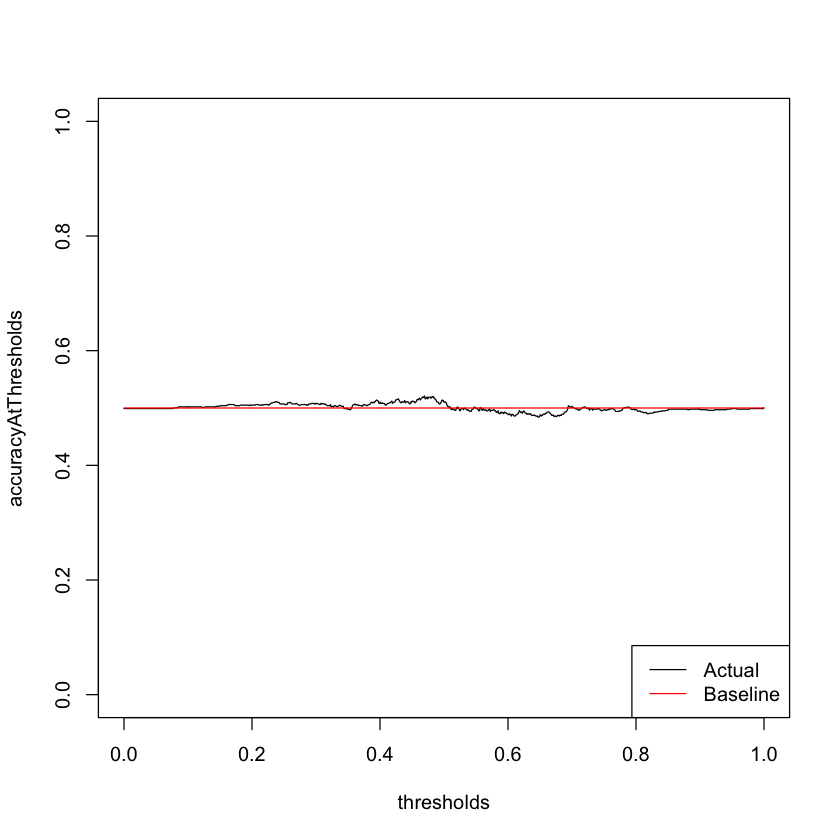

In [245]:
pare(actual, randomScores)

[1] 0.3048673
[1] 0.499501
[1] 0.6103437


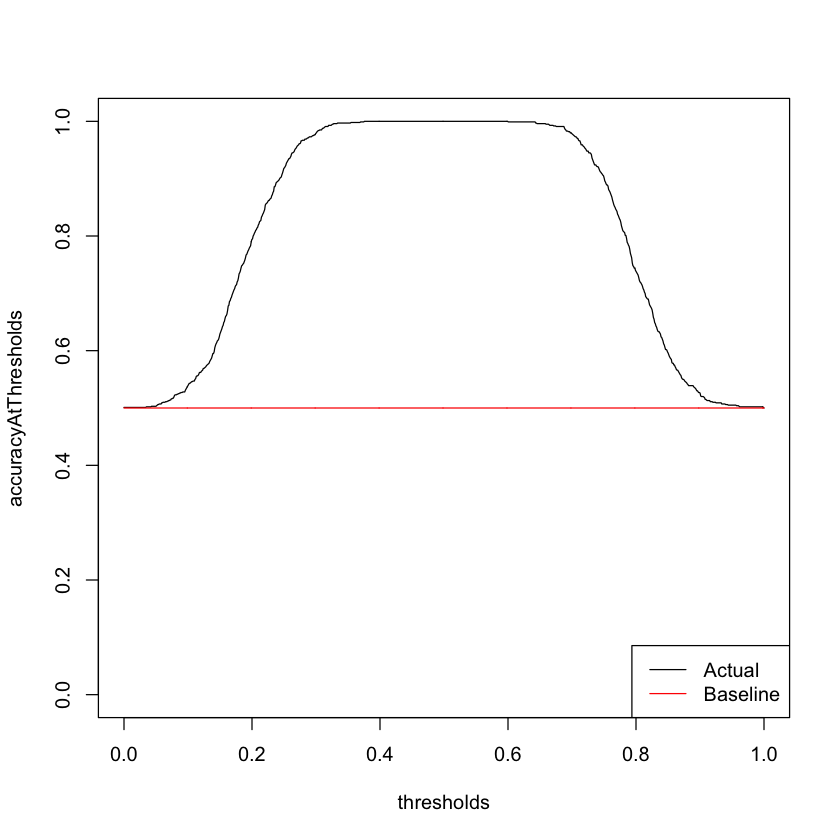

In [246]:
pare(actual, signalScores)

[1] 0.499501
[1] 0.499501
[1] 1


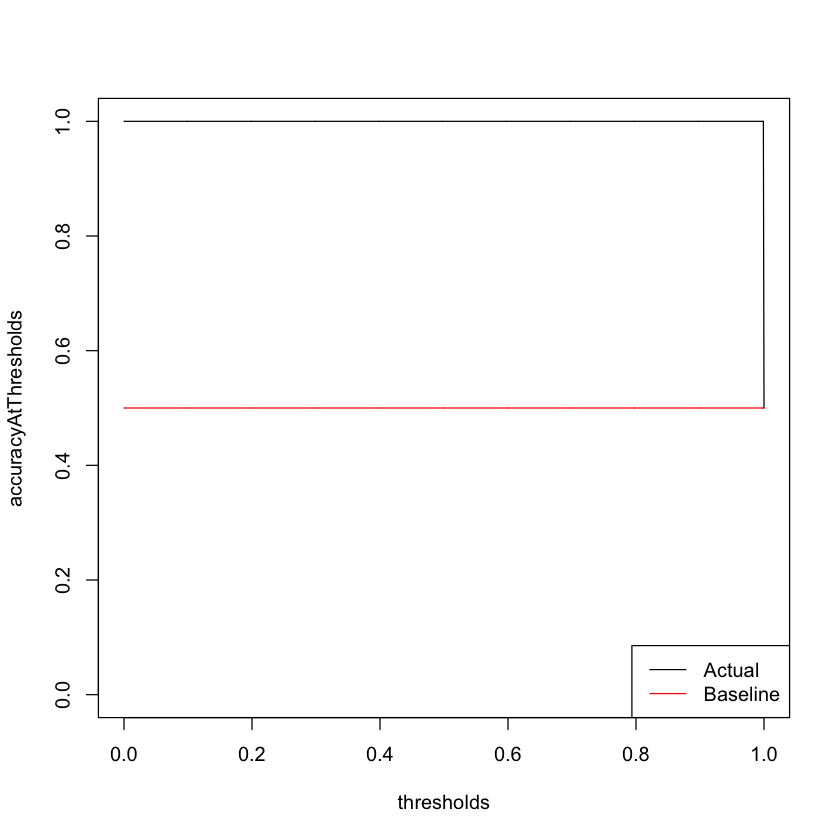

In [247]:
pare(actual, idealScores)